# Trabalho Prático - Análise de Dados em Informática

## Análise e exploração de dados

1.Construa um gráfico que permita visualizar os níveis médios do poluente O3 nas diversas regiões de 
Portugal (NUTS Code). Indique a região com nível médio de O3 mais elevado. 


/var/folders/_s/4q7y2bq57z7fljtpqtjwzfqh0000gn/T/ipykernel_39456/2065368421.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portugal_o3['Air_Pollution_Average[ug/m3]'] = df_portugal_o3['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
/var/folders/_s/4q7y2bq57z7fljtpqtjwzfqh0000gn/T/ipykernel_39456/2065368421.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portugal_o3['NUTS_Code'] = df_portugal_o3['NUTS_Code'].astype(str)


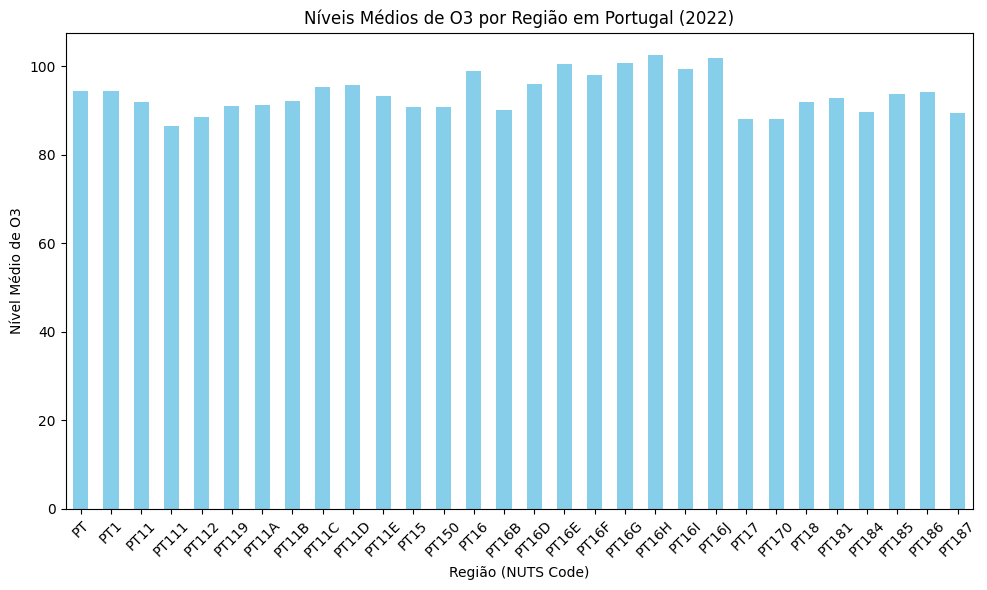

Região com maior nível médio de O3: PT16H (102.4000)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv("AIRPOL_data.csv", sep=';')

# Filtrar dados de Portugal e O3
df_portugal_o3 = df[(df['Country'] == 'Portugal') & (df['Air_Pollutant'] == 'O3')]

# Verificar dados
if df_portugal_o3.empty:
    print("Não existem dados de O3 para Portugal.")
    exit()

# Converter a coluna 'Air_Pollution_Average[ug/m3]' para float
df_portugal_o3['Air_Pollution_Average[ug/m3]'] = df_portugal_o3['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
df_portugal_o3['NUTS_Code'] = df_portugal_o3['NUTS_Code'].astype(str)

# Calcular média por região (NUTS_Code)
o3_means = df_portugal_o3.groupby('NUTS_Code')['Air_Pollution_Average[ug/m3]'].mean()

# Gráfico de barras
plt.figure(figsize=(10, 6))
o3_means.plot(kind='bar', color='skyblue')
plt.title('Níveis Médios de O3 por Região em Portugal (2022)')
plt.xlabel('Região (NUTS Code)')
plt.ylabel('Nível Médio de O3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identificar região com maior nível médio
max_region = o3_means.idxmax()
max_value = o3_means.max()
print(f"Região com maior nível médio de O3: {max_region} ({max_value:.4f})")

2.Usando boxplots, construa um gráfico que permita comparar as distribuições dos níveis médios do
poluente PM2.5 em Portugal, Espanha, Franca e Itália.

/var/folders/_s/4q7y2bq57z7fljtpqtjwzfqh0000gn/T/ipykernel_39456/1168158389.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Air_Pollution_Average[ug/m3]', data=df_pm25, palette='Set2')  # Gera o boxplot


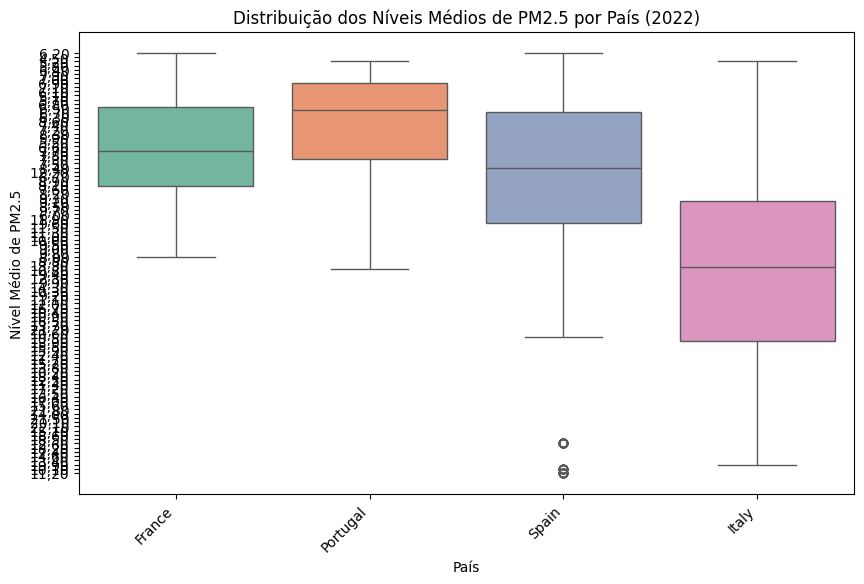

In [ ]:
import seaborn as sns

# Filtrar países e PM2.5
countries = ['Portugal', 'Spain', 'France', 'Italy']
df_pm25 = df[(df['Country'].isin(countries)) & (df['Air_Pollutant'] == 'PM2.5')]

# Criar o boxplot
plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico
sns.boxplot(x='Country', y='Air_Pollution_Average[ug/m3]', data=df_pm25, palette='Set2')  # Gera o boxplot
plt.title('Distribuição dos Níveis Médios de PM2.5 por País (2022)')  # Título
plt.xlabel('País')  # Eixo X
plt.ylabel('Nível Médio de PM2.5')  # Eixo Y
yticks(np.arange(0, 1, step=0.2))  # Set label location
plt.show()  # Exibe o gráfico